# Exploring Insights from Global Terrorism Dataset

The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset
to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover
trends, identify high-risk regions, understand attack characteristics, and potentially reveal
factors that contribute to terrorist activities.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading the dataset

df = pd.read_csv('globalterrorism.csv', encoding='latin-1')
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
col_list = df.columns.to_list()
col_list

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
# we renamed the required columns
df=df.rename(columns={"provstate": "state","region_txt": "Region","country_txt": "Country",
                      "iyear": "year","imonth": "month","iday": "day",
                      "attacktype1_txt": "attack_type","nkill": "killed",
                      "nwound": "wounded","targtype1_txt": "target_type","weaptype1_txt": "weap_type",
                      "gname": "group_name","target1": "target_name"})

In [7]:
#shortening our dataframe with the required columns
df = df[['state', 'Region', 'city', 'latitude', 'longitude','Country',
         'attack_type','year','month','day','killed', 'wounded', 'target_type',
         'group_name', 'target_name','weap_type']]

df['wounded'] = df['wounded'].fillna(0).astype(int)
df['killed'] = df['killed'].fillna(0).astype(int)
df['affected']=df['killed']+df['wounded']
# Let's have an overview of the data set
df.head()

,state,Region,city,latitude,longitude,Country,attack_type,year,month,day,killed,wounded,target_type,group_name,target_name,weap_type,affected
0,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Dominican Republic,Assassination,1970,7,2,1,0,Private Citizens & Property,MANO-D,Julio Guzman,Unknown,1
1,Federal,North America,Mexico city,19.371887,-99.086624,Mexico,Hostage Taking (Kidnapping),1970,0,0,0,0,Government (Diplomatic),23rd of September Communist League,"Nadine Chaval, daughter",Unknown,0
2,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Philippines,Assassination,1970,1,0,1,0,Journalists & Media,Unknown,Employee,Unknown,1
3,Attica,Western Europe,Athens,37.997490,23.762728,Greece,Bombing/Explosion,1970,1,0,0,0,Government (Diplomatic),Unknown,U.S. Embassy,Explosives,0
4,Fukouka,East Asia,Fukouka,33.580412,130.396361,Japan,Facility/Infrastructure Attack,1970,1,0,0,0,Government (Diplomatic),Unknown,U.S. Consulate,Incendiary,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   state        181270 non-null  object 
 1   Region       181691 non-null  object 
 2   city         181257 non-null  object 
 3   latitude     177135 non-null  float64
 4   longitude    177134 non-null  float64
 5   Country      181691 non-null  object 
 6   attack_type  181691 non-null  object 
 7   year         181691 non-null  int64  
 8   month        181691 non-null  int64  
 9   day          181691 non-null  int64  
 10  killed       181691 non-null  int32  
 11  wounded      181691 non-null  int32  
 12  target_type  181691 non-null  object 
 13  group_name   181691 non-null  object 
 14  target_name  181055 non-null  object 
 15  weap_type    181691 non-null  object 
 16  affected     181691 non-null  int32  
dtypes: float64(2), int32(3), int64(3), object(9)
memory usage: 21.5+ MB

In [9]:
#mapping the month number with the month name for easy understanding

month_mapping = {1:'Jan', 2:'Feb', 3:'Mar' , 4:'Apr', 5:'May', 6:'Jun', 7:'Jul' , 8:'Aug' , 9:'Sep' , 10:'Oct', 
                11:'Nov' , 12:'Dec'}

df['month'] = df['month'].map(month_mapping)

In [10]:
df

,state,Region,city,latitude,longitude,Country,attack_type,year,month,day,killed,wounded,target_type,group_name,target_name,weap_type,affected
0,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Dominican Republic,Assassination,1970,Jul,2,1,0,Private Citizens & Property,MANO-D,Julio Guzman,Unknown,1
1,Federal,North America,Mexico city,19.371887,-99.086624,Mexico,Hostage Taking (Kidnapping),1970,NaN,0,0,0,Government (Diplomatic),23rd of September Communist League,"Nadine Chaval, daughter",Unknown,0
2,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Philippines,Assassination,1970,Jan,0,1,0,Journalists & Media,Unknown,Employee,Unknown,1
3,Attica,Western Europe,Athens,37.997490,23.762728,Greece,Bombing/Explosion,1970,Jan,0,0,0,Government (Diplomatic),Unknown,U.S. Embassy,Explosives,0
4,Fukouka,East Asia,Fukouka,33.580412,130.396361,Japan,Facility/Infrastructure Attack,1970,Jan,0,0,0,Government (Diplomatic),Unknown,U.S. Consulate,Incendiary,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Somalia,Armed Assault,2017,Dec,31,1,2,Military,Al-Shabaab,Checkpoint,Firearms,3
181687,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Syria,Bombing/Explosion,2017,Dec,31,2,7,Military,Muslim extremists,Hmeymim Air Base,Explosives,9
181688,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Philippines,Facility/Infrastructure Attack,2017,Dec,31,0,0,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Houses,Incendiary,0
181689,Manipur,South Asia,Imphal,24.798346,93.940430,India,Bombing/Explosion,2017,Dec,31,0,0,Government (General),Unknown,Office,Explosives,0


In [11]:
df.describe()

,latitude,longitude,year,day,killed,wounded,affected
count,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,23.498343,-4.586957e+02,2002.638997,15.505650,2.266860,2.883291,5.150151
std,18.569242,2.047790e+05,13.259430,8.814043,11.227057,34.309746,40.555414
min,-53.154613,-8.618590e+07,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,11.510046,4.545640e+00,1991.000000,8.000000,0.000000,0.000000,0.000000
50%,31.467463,4.324651e+01,2009.000000,15.000000,0.000000,0.000000,1.000000
75%,34.685087,6.871033e+01,2014.000000,23.000000,2.000000,2.000000,4.000000
max,74.633553,1.793667e+02,2017.000000,31.000000,1570.000000,8191.000000,9574.000000


In [12]:
#checking the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})


print(null_percentage_df)

         Column  Null Percentage
0         state         0.231712
1        Region         0.000000
2          city         0.238867
3      latitude         2.507554
4     longitude         2.508104
5       Country         0.000000
6   attack_type         0.000000
7          year         0.000000
8         month         0.011008
9           day         0.000000
10       killed         0.000000
11      wounded         0.000000
12  target_type         0.000000
13   group_name         0.000000
14  target_name         0.350045
15    weap_type         0.000000
16     affected         0.000000


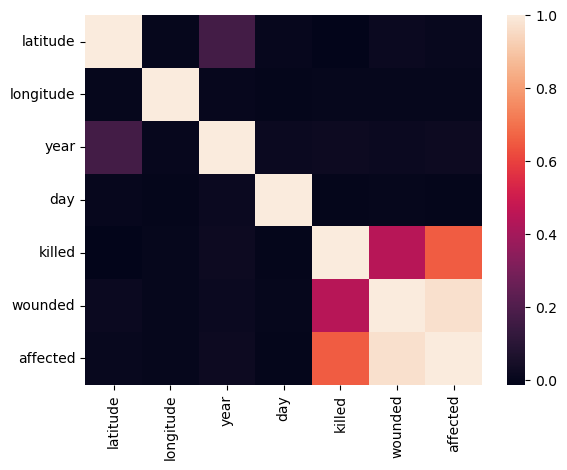

In [13]:
#checking the correlation between the features of the dataset

corr = df.corr()
sns.heatmap(corr)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

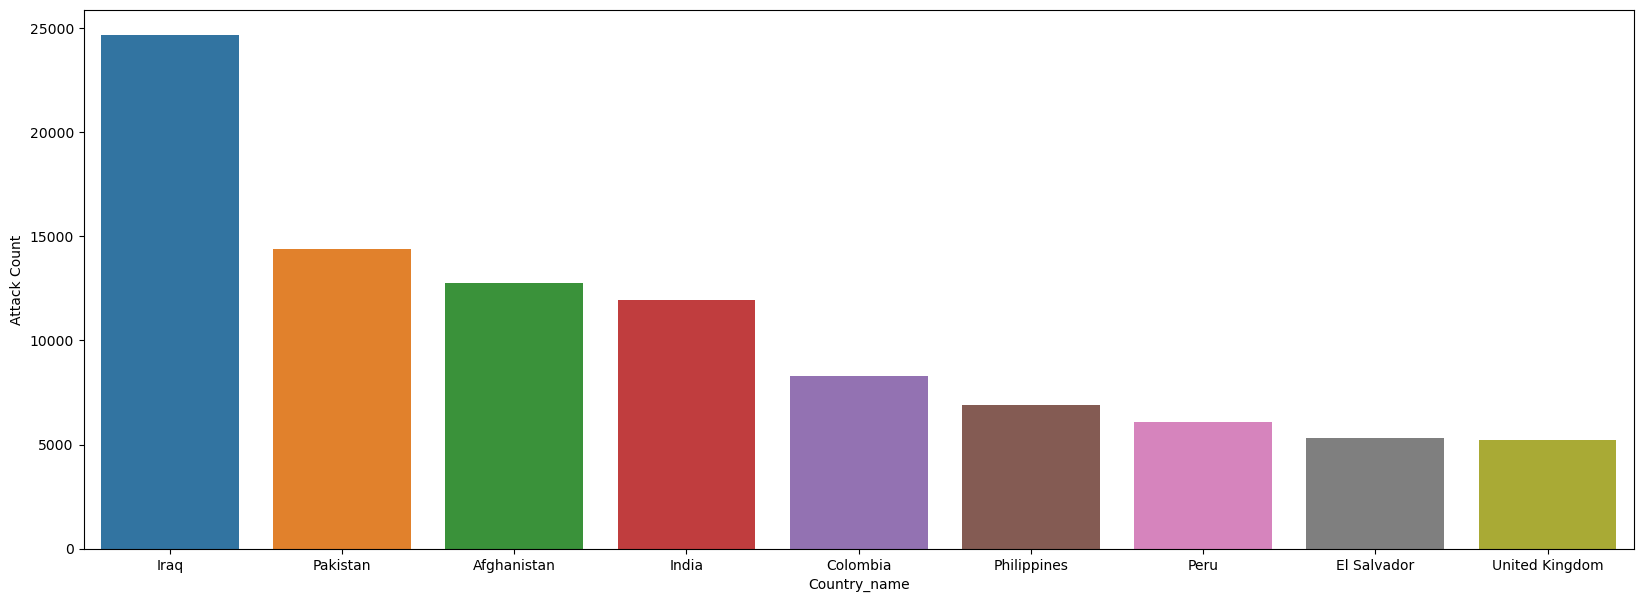

In [14]:
#checking the country with more than 5000 attempts of attacks
plt.figure(figsize =(20,7))
max_attempt = df['Country'].value_counts()
countries_more_than_5000 = max_attempt[max_attempt > 5000]
sns.barplot(x = countries_more_than_5000.index, y= countries_more_than_5000.values )
plt.xlabel('Country_name')
plt.ylabel('Attack Count')
plt.show

In [15]:
#checking top 20 countries with max wounded , killed and affected people
affected_countries = df[['Country' , 'wounded' , 'killed', 'affected']]
affected_countries = affected_countries.groupby(by = ['Country']).sum().reset_index().sort_values(by=['affected'] , ascending= False)
affected_countries[:20]

,Country,wounded,killed,affected
84,Iraq,134690,78589,213279
0,Afghanistan,44277,39384,83661
134,Pakistan,42038,23822,65860
80,India,28980,19341,48321
130,Nigeria,10238,22682,32920
167,Sri Lanka,15561,15530,31091
175,Syria,14109,15229,29338
35,Colombia,10328,14698,25026
189,United States,20702,3771,24473
140,Philippines,13367,9559,22926


In [16]:
# Death, Wounded and Affected by Region
number_of_affected = df[['Region','killed','wounded','affected']]
number_of_affected = number_of_affected.groupby(by=['Region']).sum().reset_index().sort_values(by=['affected'], ascending = False)
number_of_affected

,Region,killed,wounded,affected
5,Middle East & North Africa,137642,214308,351950
8,South Asia,101319,141360,242679
10,Sub-Saharan Africa,78386,52856,131242
7,South America,28849,16704,45553
9,Southeast Asia,15637,26259,41896
1,Central America & Caribbean,28708,8991,37699
6,North America,4916,21531,26447
11,Western Europe,6694,18332,25026
4,Eastern Europe,7415,12045,19460
3,East Asia,1152,9213,10365


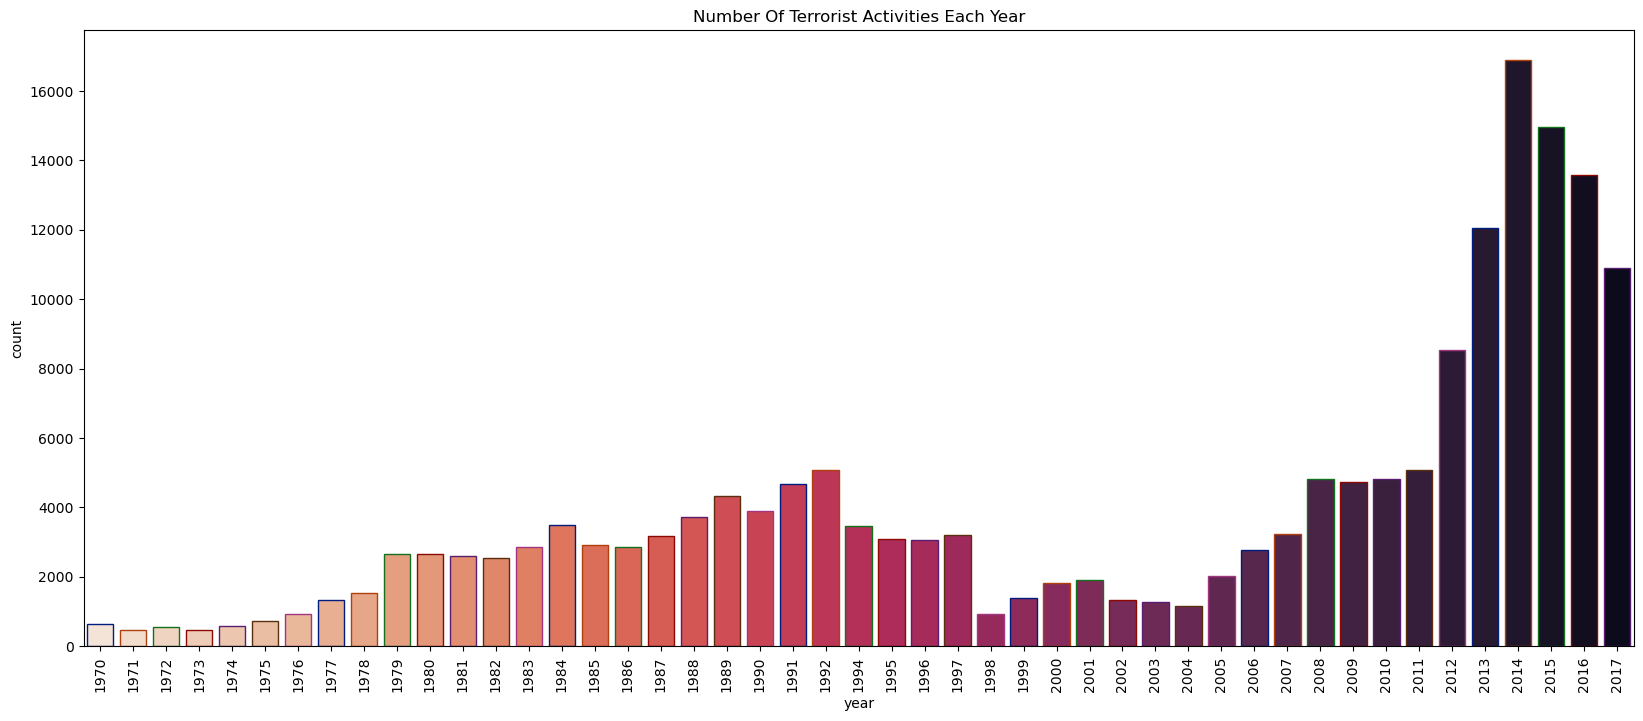

In [17]:
#checking the number of terroist attacks in each year
plt.figure(figsize = (20,8))
sns.countplot(df['year'] , palette='rocket_r',edgecolor=sns.color_palette('dark',7))
plt.title('Number Of Terrorist Activities Each Year')
plt.xticks(rotation =90)
plt.show()

In [18]:
pd.pivot_table(data=df, index=df.year, columns='Region', values='killed', aggfunc='sum')

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,0.0,3.0,NaN,0.0,0.0,1.0,34.0,11.0,4.0,41.0,1.0,79.0
1971,0.0,0.0,NaN,25.0,0.0,7.0,20.0,6.0,NaN,2.0,1.0,112.0
1972,1.0,0.0,NaN,NaN,26.0,33.0,11.0,6.0,0.0,84.0,0.0,405.0
1973,0.0,0.0,NaN,0.0,1.0,7.0,46.0,16.0,0.0,0.0,5.0,295.0
1974,0.0,0.0,NaN,1.0,1.0,81.0,18.0,21.0,0.0,5.0,4.0,408.0
1975,NaN,36.0,NaN,0.0,NaN,60.0,56.0,130.0,6.0,1.0,29.0,299.0
1976,NaN,84.0,NaN,2.0,NaN,45.0,30.0,134.0,1.0,47.0,8.0,323.0
1977,NaN,36.0,NaN,0.0,1.0,43.0,15.0,47.0,0.0,102.0,17.0,195.0
1978,2.0,164.0,NaN,4.0,4.0,671.0,15.0,93.0,5.0,158.0,112.0,231.0


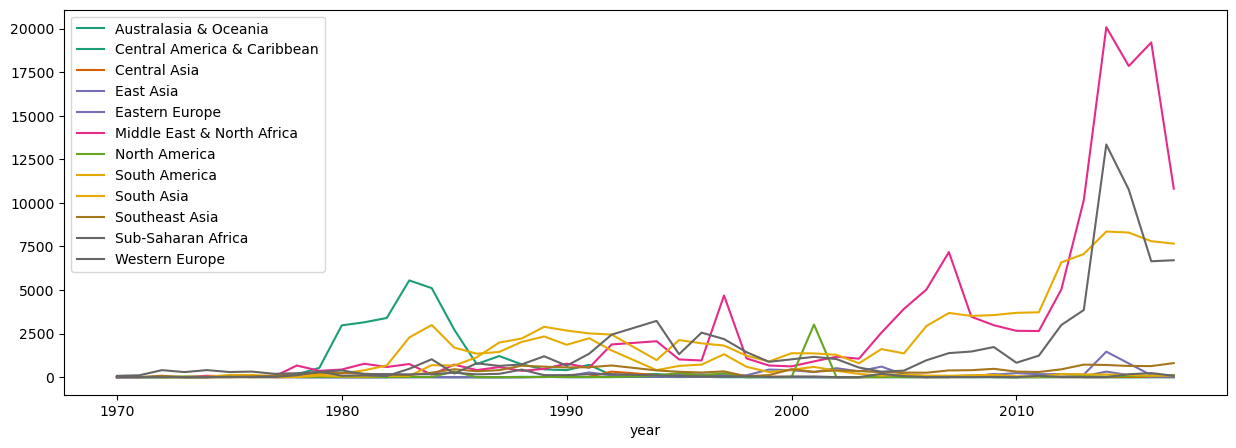

In [19]:
pd.pivot_table(data=df, index=df.year, columns='Region', values='killed', aggfunc='sum')\
    .plot.line(figsize=(15,5), colormap='Dark2').legend(title=None)

Checking Attack vs Killed for top 15 countries

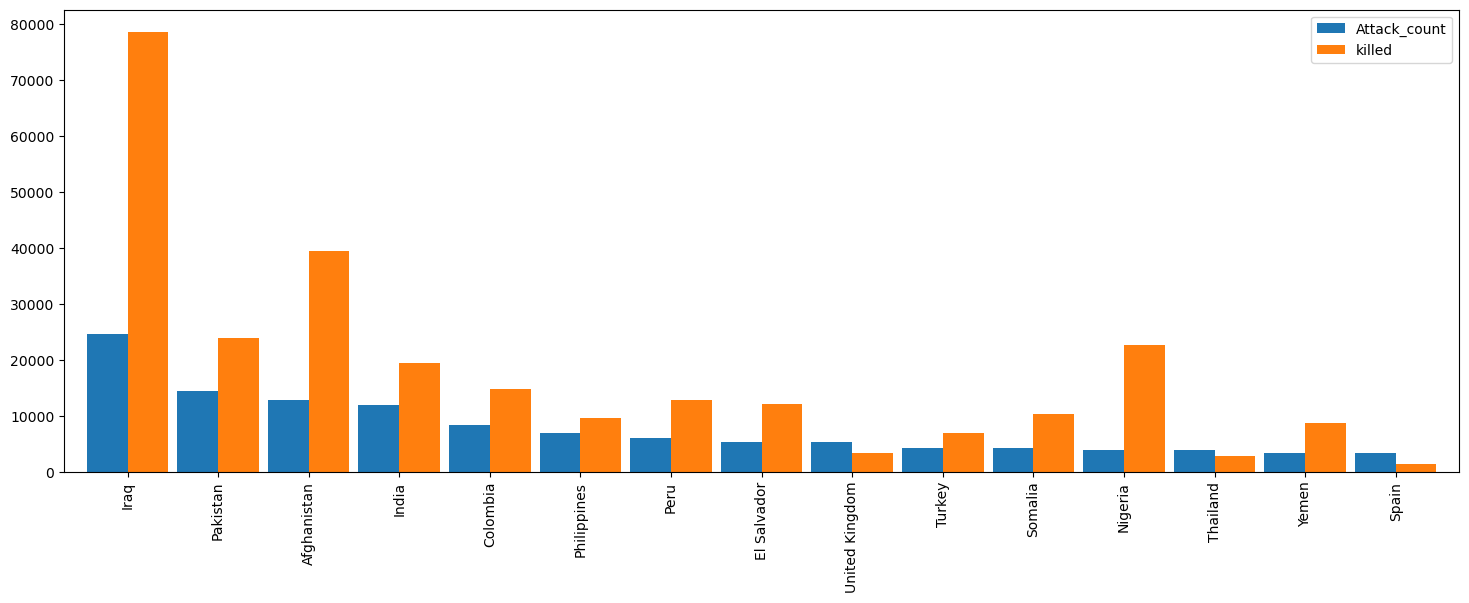

In [20]:
count_terror=df['Country'].value_counts()[:15].to_frame()
count_terror.columns=['Attack_count']

count_kill = df.groupby(by='Country')['killed'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Top cities affected by terror attack

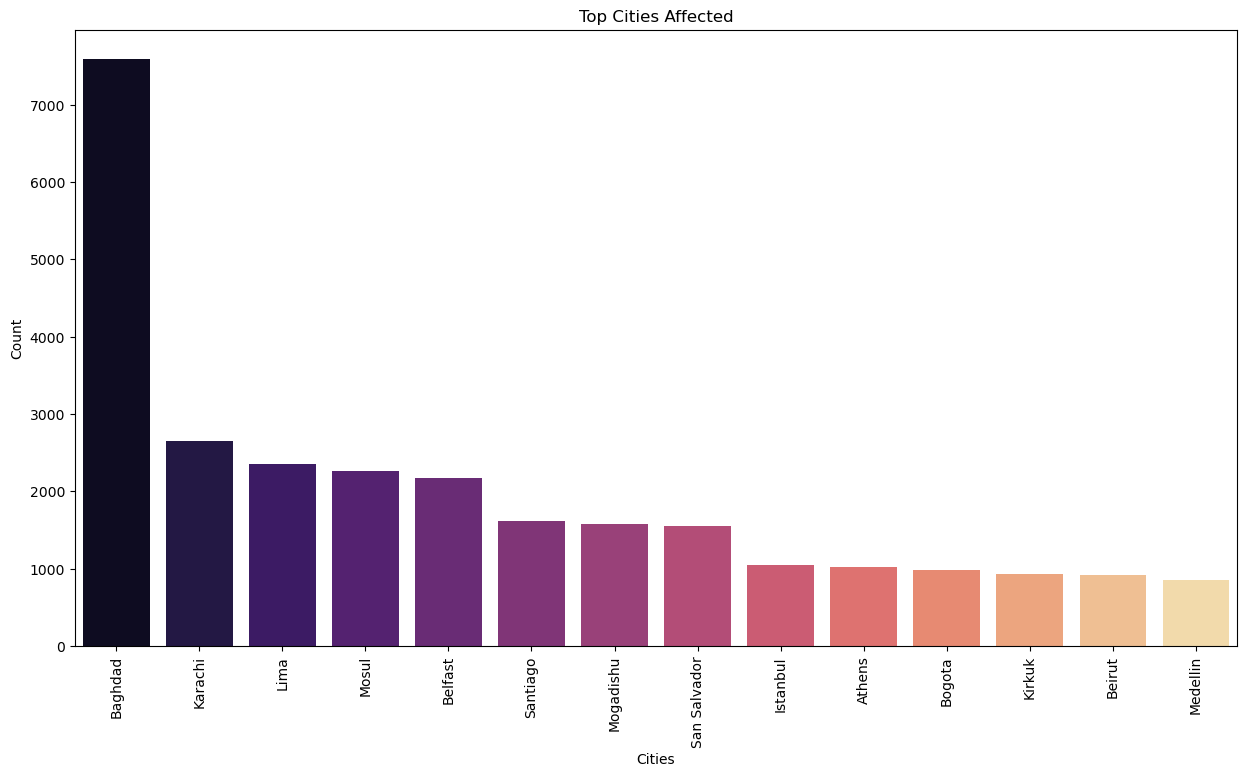

In [21]:
plt.figure(figsize=(15,8))

sns.barplot(df['city'].value_counts()[1:15].index , df['city'].value_counts()[1:15].values, palette = 'magma')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Top 15 most active terrorist groups

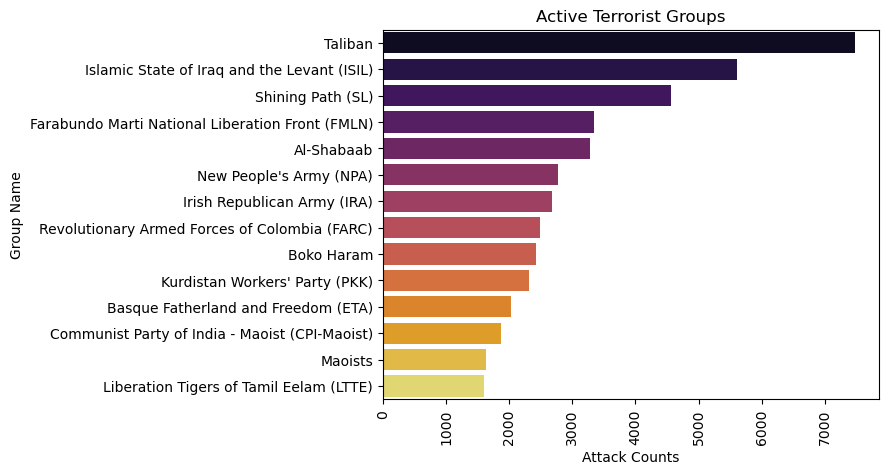

In [22]:
sns.barplot(df['group_name'].value_counts()[1:15].values ,df['group_name'].value_counts()[1:15].index , palette = 'inferno')
plt.title('Active Terrorist Groups')
plt.xticks(rotation = 90)
plt.xlabel('Attack Counts')
plt.ylabel('Group Name')
plt.show()

Count of Affected people by these top 15 terrorist groups

In [23]:
affected_count = df.groupby('group_name')['affected'].sum().to_frame().sort_values('affected', ascending = False)[1:15]
affected_count

,affected
group_name,
Islamic State of Iraq and the Levant (ISIL),69595
Taliban,57342
Boko Haram,29800
Al-Qaida,28372
Liberation Tigers of Tamil Eelam (LTTE),22020
Al-Shabaab,16954
Tehrik-i-Taliban Pakistan (TTP),15574
Al-Qaida in Iraq,14724
Shining Path (SL),14632


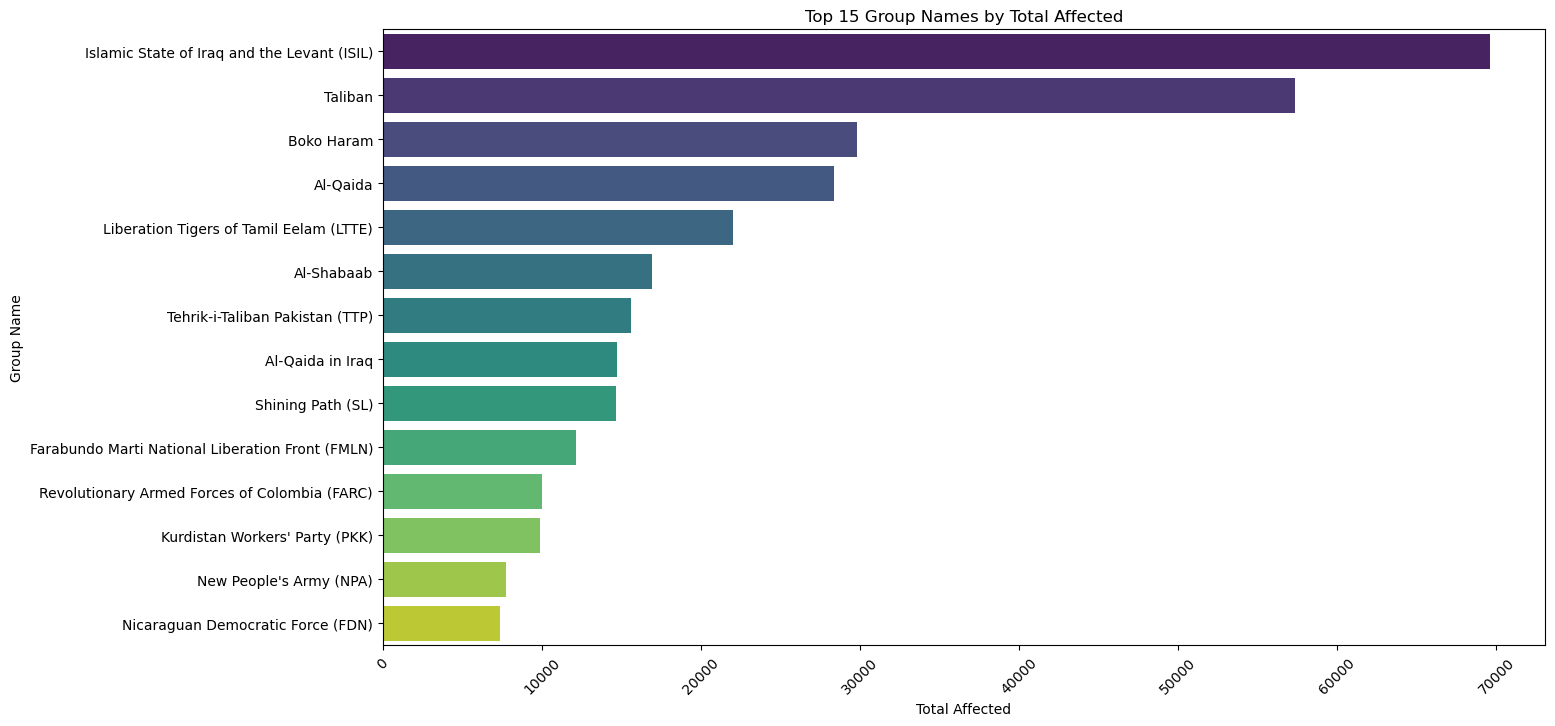

In [24]:
plt.figure(figsize = (15,8))
sns.barplot('affected' , affected_count.index , data=affected_count, palette='viridis')
plt.xlabel('Total Affected')
plt.ylabel('Group Name')
plt.title('Top 15 Group Names by Total Affected')
plt.xticks(rotation=45) 
plt.show()

 Types of terrorist attacks in the world.

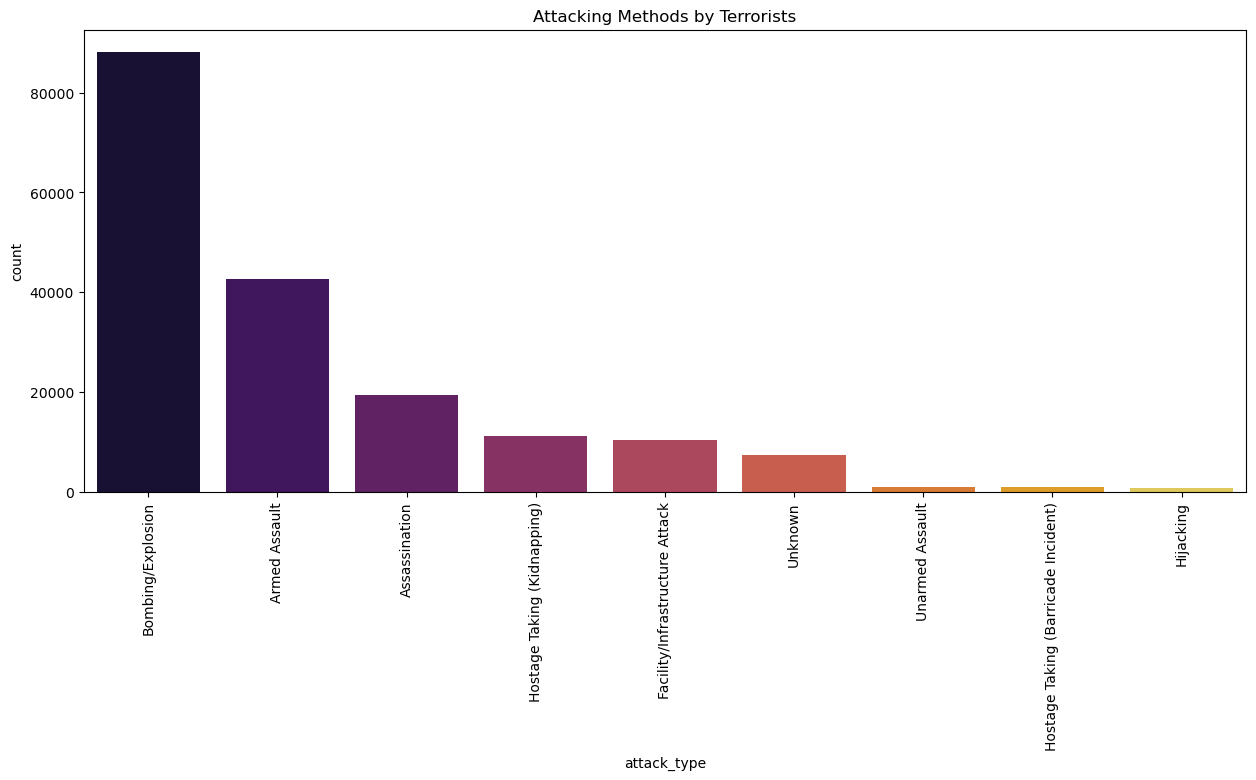

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('attack_type',data=df,palette='inferno',order=df['attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

Target Type for these terrorists

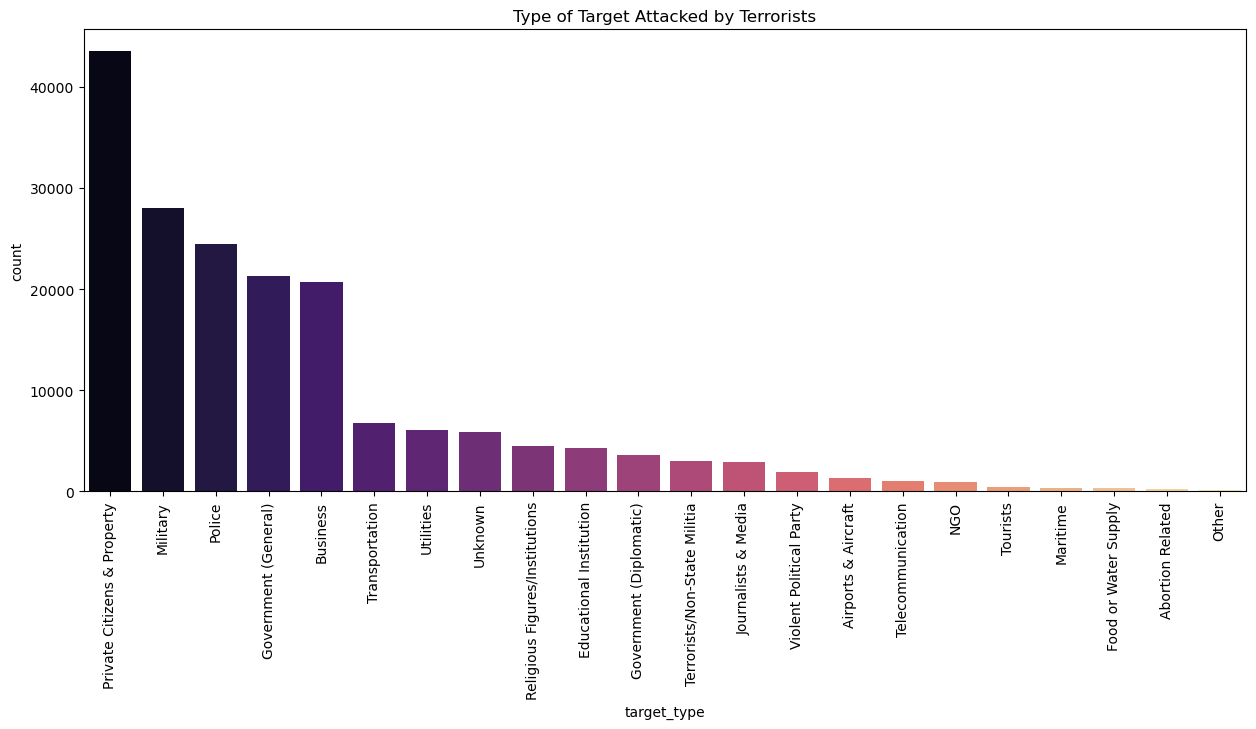

In [27]:
plt.subplots(figsize=(15,6))
sns.countplot('target_type',data=df,palette='magma',order=df['target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Type of Target Attacked by Terrorists')
plt.show()